<a href="https://colab.research.google.com/github/AlcoholWolf/py-play/blob/main/ch02_05_%ED%9E%88%ED%8A%B8%EB%A7%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch02.05. 히트맵

---
* 날짜:
* 이름:

```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 4]
plt.style.use('seaborn-white')
sns.set_style('white')

```

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 4]
plt.style.use('seaborn-white')
sns.set_style('white')


## **개념정리**
---




### (1) Matplotlib 으로 그리기


#### | 기본사용

```
x = [[1,2,3],
     [4,1,6],
     [7,8,1]]
plt.matshow(x, cmap='rainbow')
plt.show()
```

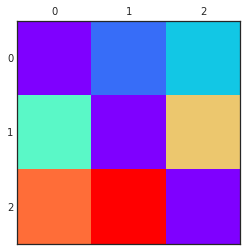

In [ ]:
x = [[1,2,3],
     [4,1,6],
     [7,8,1]]
plt.matshow(x, cmap='rainbow')
plt.show()

#### | 컬러바

```
plt.colorbar(ax, 
             cmap=None, # 컬러맵
             alpha=None, # 투명도
             orientation='vertical', # 위치 {'vertical', 'horizontal'}
             extend=None,  # 초과값 {'neither', 'both', 'min', 'max'}
             shrink = None # 길이 축소
             aspect = None # 세로, 가로 비
             label=''# 라벨)
```

AttributeError: ignored

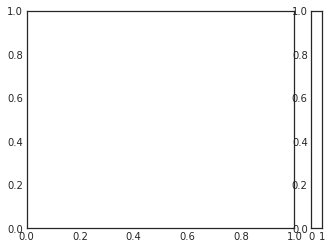

In [ ]:
plt.colorbar(x)
            #  alpha=0.2) # 투명도
            #  orientation='vertical') # 위치 {'vertical', 'horizontal'}
            #  extend='min')  # 초과값 {'neither', 'both', 'min', 'max'}
            #  cmap='#0000FF', # 컬러맵
            #  shrink = 1) # 길이 축소
            #  aspect = 1, 1 # 세로, 가로 비
            #  label='balu'# 라벨)

### (2) Seaborn 으로 그리기
---



#### | 기본사용

```
sns.heatmap(x)
```

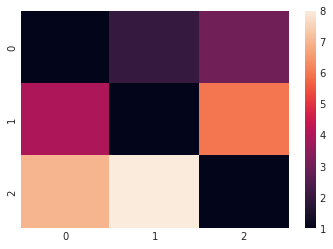

In [ ]:
sns.heatmap(x)

#### | 옵션

```
seaborn.heatmap(data,
                cmap=None, # 컬러맵
                annot=None, # 값 표기
                fmt='.2g', # 데이터 타입
                linewidths=0, # 선 굵기
                linecolor='white', # 선 색
                cbar=True, # 컬러맵 표기
                square=False, # 사이즈 정사각
                xticklabels='auto', # x 눈금 라벨 
                yticklabels='auto', # y 눈금 라벨
                vmin = # 최소값
                vmax = # 최대값
                ax=None, **kwargs)
```

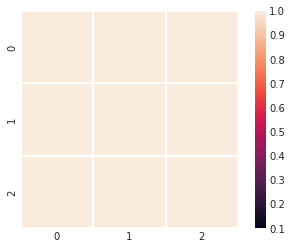

In [ ]:
sns.heatmap(x,
                cmap=None, # 컬러맵
                annot=None, # 값 표기
                fmt='.2g', # 데이터 타입
                linewidths=1, # 선 굵기
                linecolor='white', # 선 색
                cbar=True, # 컬러맵 표기
                square=True, # 사이즈 정사각
                xticklabels='auto', # x 눈금 라벨 
                yticklabels='auto', # y 눈금 라벨
                vmin = 0.1, # 최소값
                vmax = 1, # 최대값
                ax=None)

#### | DataFrame 사용
---



* 데이터 프레임을 만들어 줍니다.


In [ ]:
df = pd.DataFrame(x)
df

,0,1,2
0,1,2,3
1,4,1,6
2,7,8,1



* 데이터프레임에서 기본적으로 플롯을 제공합니다.

```
df.style.background_gradient()
```


In [ ]:
df.style.background_gradient()

,0,1,2
0,1,2,3
1,4,1,6
2,7,8,1


* 데이터프레임 기반으로 seaborn을 사용합니다.


```
sns.heatmap(data=df)
```


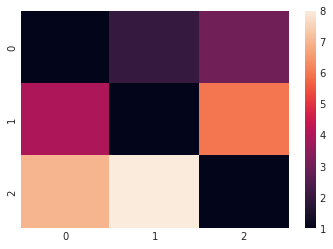

In [ ]:
sns.heatmap(data=df)


##  **실습** 
---



### (1) pivot 테이블 이용한 시계열 데이터 시각화


```
np.random.seed(42)
t = ['오전','오후','저녁']*5
day=[f'2020/01/0{i+1}' for i in range(5) for j in range(3)]
vals = np.random.randint(100,500, len(t))

```

In [ ]:
np.random.seed(42)
t = ['오전','오후','저녁']*5
day=[f'2020/01/0{i+1}' for i in range(5) for j in range(3)]
vals = np.random.randint(100,500, len(t))

df = pd.DataFrame([day, t]).T
df['Counts'] = vals
df.rename({0:'Day', 1:'Time'}, axis = 1)

,Day,Time,Counts
0,2020/01/01,오전,202
1,2020/01/01,오후,448
2,2020/01/01,저녁,370
3,2020/01/02,오전,206
4,2020/01/02,오후,171
5,2020/01/02,저녁,288
6,2020/01/03,오전,120
7,2020/01/03,오후,202
8,2020/01/03,저녁,221
9,2020/01/04,오전,314


In [ ]:
# 행 / 열 / 값
df.pivot(0, 1, 'Counts').style.background_gradient()
# df.style.background_gradient()

1,오전,오후,저녁
0,,,
2020/01/01,202,448,370
2020/01/02,206,171,288
2020/01/03,120,202,221
2020/01/04,314,430,187
2020/01/05,472,199,459


### (2) Iris 데이터 변수별 상관관계 분석


```
           꽃받침 길이   꽃받침 너비   꽃의 길이  꽃의 너비
 샘플1      
 샘플2 
 ...
 샘플150
```


```
from sklearn.datasets import load_iris
iris = load_iris()
```


* `.feature_names` : 변수 이름
* `.target_names` : 타겟 이름
* `.data` : 데이터 
* `.target` : 타겟


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()


bd = iris.data
bt = iris.target
bn = iris.target_names
bf = iris.feature_names

# 프린트로 확인하기
print(bd.shape,bt.shape)
print(bn)
print(bf)

# 데이터를 bd로 설정, 컬럼명 변경, 타겟 컬럼 추가
df = pd.DataFrame(bd)
df.columns = bf
df['target'] = bt

# 코렐로 보기 쉽게 표현
df.corr().style.background_gradient()

(150, 4) (150,)
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


### (3) Iris 데이터 종류별 크기 분석



In [ ]:
# 타겟 기준 평균 구하기
df.groupby('target').mean().style.background_gradient()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,5.006000,3.428000,1.462000,0.246000
1,5.936000,2.770000,4.260000,1.326000
2,6.588000,2.974000,5.552000,2.026000



##  **과제** 
---



### (1) 히트맵을 이용한 flight 데이터 시각화


```
df=sns.load_dataset('flights')
```

* `seaborn`의 `load_dataset`을 이용해 `flights` 데이터를 불러오세요.
* `year`를 세로축, `month`를 가로축으로 하는 피벗 테이블을 그리고 히트맵으로 시각화 하세요.



In [ ]:
# df 함수 지정
df = sns.load_dataset('flights')

df.pivot('year', 'month', 'passengers').style.background_gradient()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336



### (2) 캘리포니아 집값 데이터 변수별 상관관계 분석

* /content/sample_data/california_housing_test.csv을 불러오세요.
* 변수별 상관관계를 나타내는 히트맵을 `seaborn`을 이용해  그리세요.
* 변수들 중 상관관계가 높은 변수 쌍을 각각 x축, y축으로 하는 산점도를 그리세요. (2개이상)
* 변수들 중 `median_house_value`와 가장 상관관계가 높은 변수를 찾고 둘을 각각 x축, y축으로 하는 산점도를 그리세요.

In [ ]:
df = pd.read_csv('/content/sample_data/california_housing_test.csv')
df.corr().style.background_gradient()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925017,-0.064203,0.049865,0.070869,0.111572,0.051062,-0.018701,-0.050662
latitude,-0.925017,1.000000,-0.025143,-0.039632,-0.068245,-0.117318,-0.068296,-0.072363,-0.138428
housing_median_age,-0.064203,-0.025143,1.000000,-0.367850,-0.323154,-0.299888,-0.305171,-0.144315,0.091409
total_rooms,0.049865,-0.039632,-0.367850,1.000000,0.937749,0.838867,0.914116,0.221249,0.160427
total_bedrooms,0.070869,-0.068245,-0.323154,0.937749,1.000000,0.856387,0.970758,0.024025,0.082279
population,0.111572,-0.117318,-0.299888,0.838867,0.856387,1.000000,0.895530,0.032361,-0.001192
households,0.051062,-0.068296,-0.305171,0.914116,0.970758,0.895530,1.000000,0.048625,0.100176
median_income,-0.018701,-0.072363,-0.144315,0.221249,0.024025,0.032361,0.048625,1.000000,0.672695
median_house_value,-0.050662,-0.138428,0.091409,0.160427,0.082279,-0.001192,0.100176,0.672695,1.000000


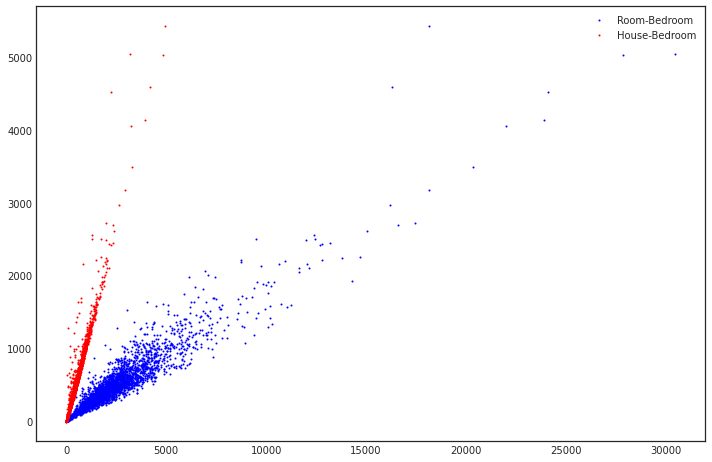

In [191]:
# plt.plot(df['households'], df['total_bedrooms'], marker='^', markersize=1)
# plt.plot(df['total_rooms'], df['total_bedrooms'], marker='^', markersize=1)

plt.rcParams['figure.figsize'] = [12, 8]  
plt.plot(df['total_rooms'], df['total_bedrooms'], 'bo', markersize=1, label = 'Room-Bedroom')
plt.plot(df['households'], df['total_bedrooms'], 'ro', markersize=1, label = 'House-Bedroom')
plt.legend()

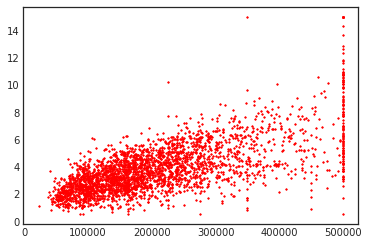

In [172]:
plt.plot(df['median_house_value'], df['median_income'], 'ro', markersize=1)